In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# Inline/embedding visualization of created plot
%matplotlib inline

import seaborn

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Create legends

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


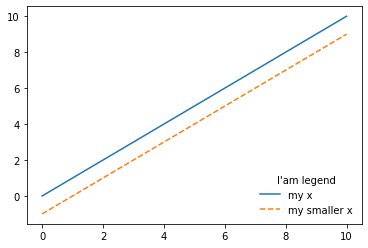

In [13]:
x = np.linspace(0,10,11)
print( x )

plt.plot(x,x, "-", label = "my x")
plt.plot(x,x-1, "--", label = "my smaller x" )
plt.legend(title="I'am legend", loc = "lower right", frameon = False)

Text(8, 1.5, 'my favourite number')

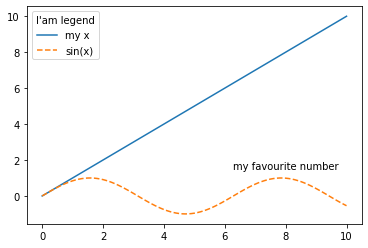

In [22]:
x = np.linspace(0,10,101)
plt.plot(x,x, "-", label = "my x")
plt.plot(x,np.sin(x), "--", label = "sin(x)" )
plt.legend(title="I'am legend", loc = "top left")
# Let's write a text at position (8,1)
plt.text(8,1, "my favourite number", ha = "center")

Text(8, 5, 'This is interesting')

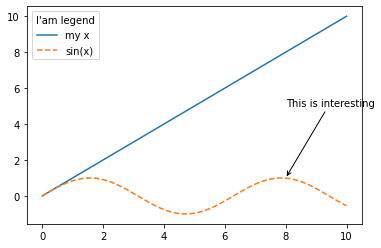

In [26]:
x = np.linspace(0,10,101)
plt.plot(x,x, "-", label = "my x")
plt.plot(x,np.sin(x), "--", label = "sin(x)" )
plt.legend(title="I'am legend", loc = "top left")
# Let's put a text with an arrow pointing at position (8,1)
plt.annotate("This is interesting", xy = (8,1), xytext = (8,5), arrowprops = dict(arrowstyle = "->") )

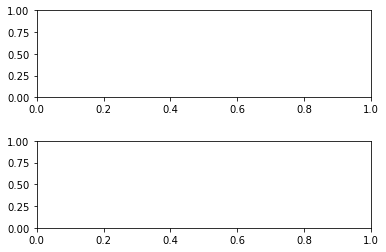

In [33]:
# Subplots too
plt.figure().subplots_adjust( hspace = 0.5, wspace = 0.5)
plt.subplot(2,1,1) # plot index #1
plt.subplot(2,1,2) # plot index #2

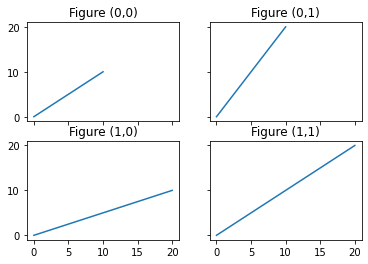

In [49]:
# We make 2x2 subplots but with X and Y axis in common (otherwise they are repeated for each subplot)
fig, axes = plt.subplots(2,2, sharex = "col", sharey = "row" )

for i in range(2):
    for j in range(2):
        axes[i,j].title.set_text( "Figure ({0},{1})".format(i,j) )
        axes[i,j].plot(x*(i+1),x*(j+1), "-") # Just to make them look different ...

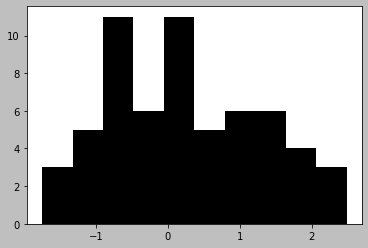

In [52]:
y = np.random.randn(60)
with plt.style.context("grayscale"):
    plt.hist(y)

# Seaborn at last

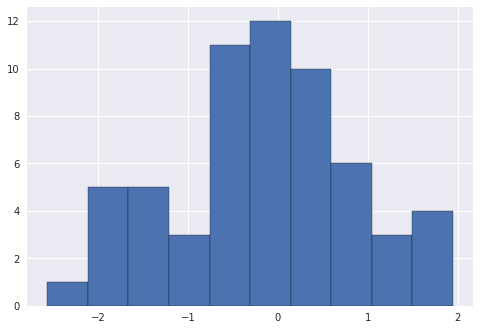

In [57]:
y = np.random.randn(60)
with plt.style.context("seaborn"):
    plt.hist(y, edgecolor = "black")

In [83]:
dataset_name = "datasets/nasa_gistemp.csv"
df1 = pd.read_csv(dataset_name, index_col=0, skiprows=1)
df1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-.15,-.24,-.22,-.18,-.17,***,***,-0.12,-0.16,-.20
1881,-0.20,-0.14,0.03,0.05,0.06,-0.18,0.00,-0.03,-.15,-.22,-.18,-.07,-.08,-.09,-.17,0.05,-0.07,-.18
1882,0.17,0.14,0.05,-0.16,-0.14,-0.22,-0.16,-0.07,-.14,-.24,-.16,-.36,-.11,-.08,.08,-0.09,-0.15,-.18
1883,-0.29,-0.36,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-.22,-.11,-.24,-.11,-.18,-.20,-.34,-0.16,-0.09,-.19
1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.33,-0.27,-.27,-.25,-.33,-.31,-.29,-.27,-.11,-0.37,-0.32,-.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.86,0.90,0.96,0.77,0.79,0.82,0.75,0.83,.84,1.09,1.06,1.16,.90,.87,.85,0.84,0.80,1.00
2016,1.17,1.37,1.36,1.12,0.96,0.82,0.85,1.02,.92,.88,.91,.86,1.02,1.04,1.23,1.15,0.89,.90
2017,1.04,1.14,1.16,0.94,0.90,0.73,0.82,0.87,.79,.90,.89,.95,.93,.92,1.01,1.00,0.81,.86


In [86]:
# Check the data
df1.info()

# There should be no empty values
df1.isnull().sum()

# Some columns are not float (maybe null values), so we create a function to convert them
def cleanup(x):
    try:
        return float(x)
    except:
        print( "Value {0} is NaN".format(x) )
        return np.NaN

df1
for column in df1.columns:
    # Replace values that are not float numbers (e.g., we have "***" in the 1st and last rows) with NaN
    df1[column] = df1[column].apply(cleanup)
    # we need to do both forward- and backward-filling (copy previous value and copy next value)
    # See https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
    df1[column].fillna( method ="ffill", inplace=True)
    df1[column].fillna( method ="bfill", inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     140 non-null    float64
 1   Feb     140 non-null    float64
 2   Mar     140 non-null    float64
 3   Apr     140 non-null    float64
 4   May     140 non-null    float64
 5   Jun     140 non-null    float64
 6   Jul     140 non-null    float64
 7   Aug     140 non-null    float64
 8   Sep     140 non-null    float64
 9   Oct     140 non-null    float64
 10  Nov     140 non-null    float64
 11  Dec     140 non-null    float64
 12  J-D     140 non-null    float64
 13  D-N     139 non-null    float64
 14  DJF     139 non-null    float64
 15  MAM     140 non-null    float64
 16  JJA     140 non-null    float64
 17  SON     140 non-null    float64
dtypes: float64(18)
memory usage: 20.8 KB


In [87]:
df1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.15,-0.24,-0.22,-0.18,-0.17,-0.09,-0.17,-0.12,-0.16,-0.20
1881,-0.20,-0.14,0.03,0.05,0.06,-0.18,0.00,-0.03,-0.15,-0.22,-0.18,-0.07,-0.08,-0.09,-0.17,0.05,-0.07,-0.18
1882,0.17,0.14,0.05,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.16,-0.36,-0.11,-0.08,0.08,-0.09,-0.15,-0.18
1883,-0.29,-0.36,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.09,-0.19
1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.33,-0.27,-0.27,-0.25,-0.33,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.86,0.90,0.96,0.77,0.79,0.82,0.75,0.83,0.84,1.09,1.06,1.16,0.90,0.87,0.85,0.84,0.80,1.00
2016,1.17,1.37,1.36,1.12,0.96,0.82,0.85,1.02,0.92,0.88,0.91,0.86,1.02,1.04,1.23,1.15,0.89,0.90
2017,1.04,1.14,1.16,0.94,0.90,0.73,0.82,0.87,0.79,0.90,0.89,0.95,0.93,0.92,1.01,1.00,0.81,0.86


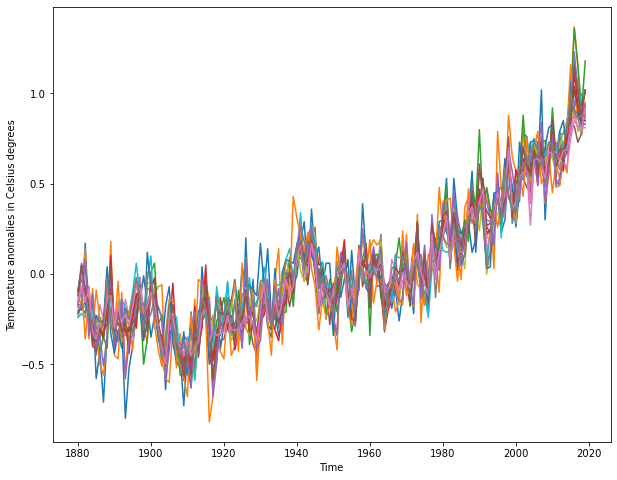

In [90]:
plt.figure(figsize = (10,8) )
plt.xlabel( "Time" )
plt.ylabel( "Temperature anomalies in Celsius degrees" )
plt.plot(df1)

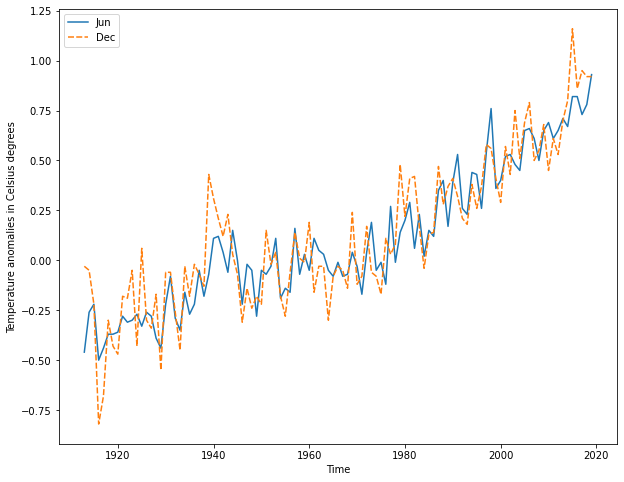

In [94]:
# Too much infor in the previous figure, so 
plt.figure(figsize = (10,8) )
plt.xlabel( "Time" )
plt.ylabel( "Temperature anomalies in Celsius degrees" )
data_slice = [df1.loc["1913":,"Jun"],df1.loc["1913":,"Dec"]]
seaborn.lineplot( data = data_slice )

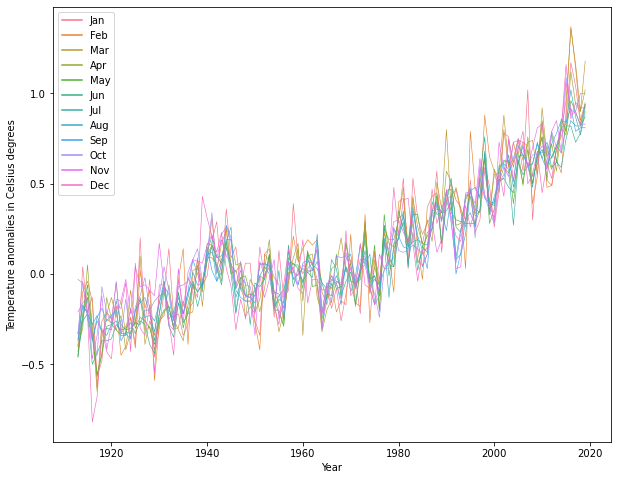

In [99]:
# Too much infor in the previous figure, so 
plt.figure(figsize = (10,8) )
plt.xlabel( "Time" )
plt.ylabel( "Temperature anomalies in Celsius degrees" )
data_slice = df1.loc["1913":,"Jan":"Dec"]
seaborn.lineplot( data = data_slice, linewidth=0.6, dashes = False )

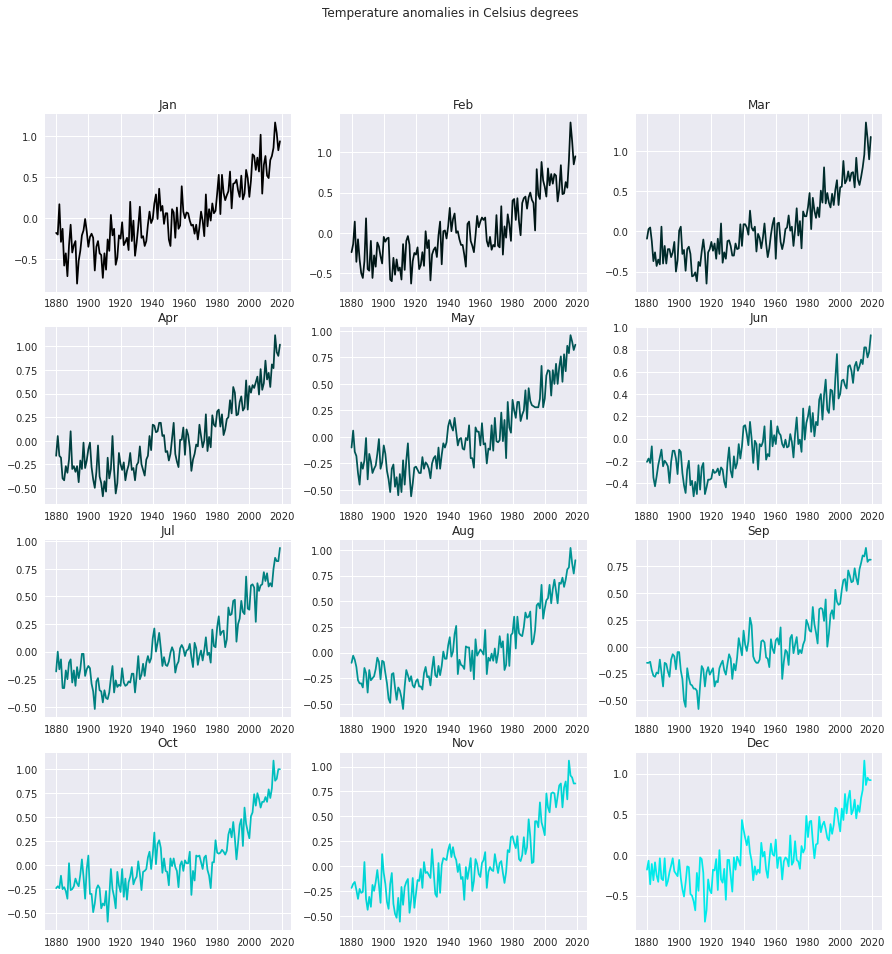

In [102]:
with plt.style.context("seaborn"):
    fix,axes = plt.subplots(4,3,figsize = (15,15))
    fix.suptitle( "Temperature anomalies in Celsius degrees" )
    col = 0
    for i in range(4):
        for j in range(3):
            axes[i,j].plot( df1.index, df1.loc[:,df1.columns[col]], color = (0, col/12, col/12, 1))
            axes[i,j].set_title(df1.columns[col])
            col = col + 1

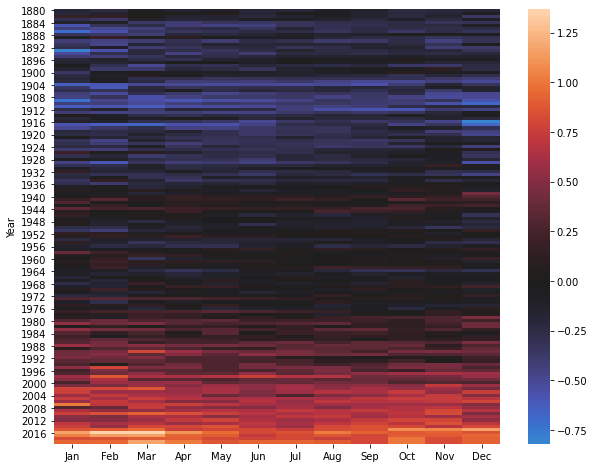

In [107]:
# Use a heatmap 
plt.figure( figsize = (10,8) )
seaborn.heatmap( df1.iloc[:,0:12], center = 0 )

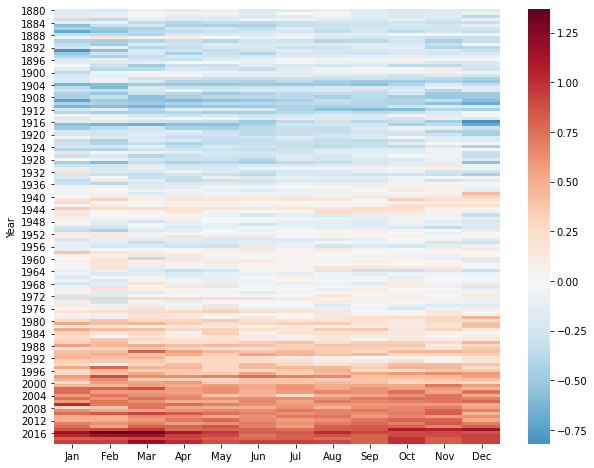

In [113]:
# Let's use some different colora
plt.figure( figsize = (10,8) )
seaborn.heatmap( df1.iloc[:,0:12], cmap = 'RdBu_r', center = 0 )

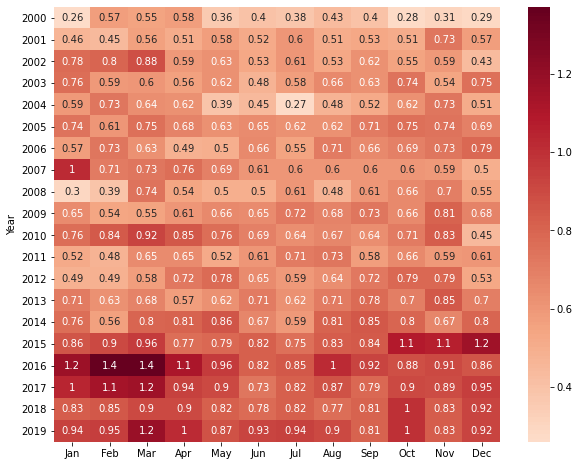

In [116]:
# We can also put annotation, but we have to reduce the dataset in order to make them readable
plt.figure( figsize = (10,8) )

# use iloc[] when you look up by index (e.g., df1.iloc[0:20,1:])
# use loc[] when you look up by column/row names (e.g., df1.loc["2000":"2019","Jan":"Dec"])
seaborn.heatmap( df1.loc["2000":"2019","Jan":"Dec"], cmap = 'RdBu_r', center = 0, annot = True )

# Interactive graphs

In [119]:
pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=d4204efb09ef2db5543cabd2871a121430cfeeb6cb924c603126aee5e70cc63c
  Stored in directory: c:\users\scalasm\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.graph_objects as go

go.Figure( data = go.Heatmap( z = df1, x = df1.columns[0:12], y = df1.index, colorscale = "rdbu", reversescale = True))

NameError: name 'df1' is not defined

In [124]:
fig = go.Figure()
col = 0
for col in range(12):
    scatter_plot = go.Scatter( x = df1.index,
                              y = df1.loc[:,df1.columns[col]],
                              name = df1.columns[col]
                             )
    fig.add_trace( scatter_plot )
    col += 1
fig.show()